<a href="https://colab.research.google.com/github/Demshin82/AI-architect/blob/master/%D0%9F%D1%80%D0%BE%D0%BC%D0%B5%D0%B6%D1%83%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%B0%D1%82%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Имортируем библиотеки

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Скачиваем датасет и заводим его в датафрейм DF_Main

In [5]:
DF_Main = pd.read_csv('https://raw.githubusercontent.com/Demshin82/AI-architect/master/dataset_tk.csv')
DF_Main = DF_Main.rename(columns={'Unnamed: 0':'Date'})
DF_Main

,Date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,01/12/2020 00:00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,02/12/2020 00:00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,03/12/2020 00:00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,04/12/2020 00:00:00,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3


Производим проверку наличия выбросов, что бы небыло "месиво" на графиках, разносим данные на 2 графика

<Axes: >

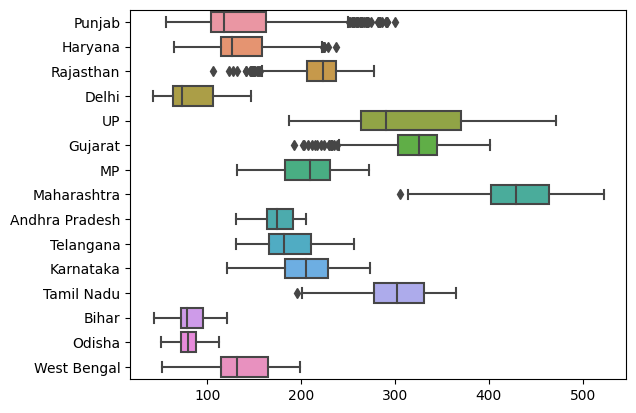

In [ ]:
sns.boxplot(DF_Main[['Punjab','Haryana','Rajasthan','Delhi','UP','Gujarat','MP','Maharashtra','Andhra Pradesh','Telangana','Karnataka','Tamil Nadu','Bihar','Odisha','West Bengal']],width=0.8,orient='h')

<Axes: >

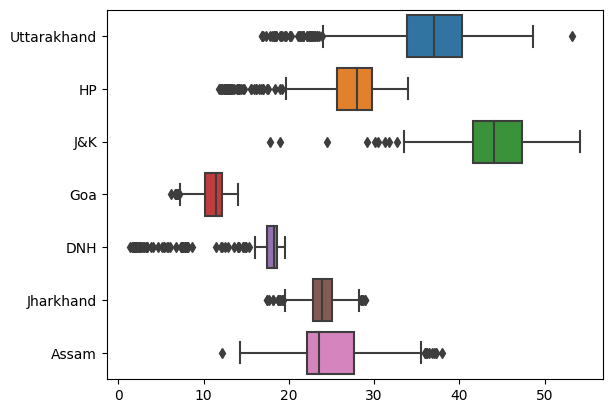

In [ ]:
sns.boxplot(DF_Main[['Uttarakhand','HP','J&K','Goa','DNH','Jharkhand','Assam']],width=0.8,orient='h')

Подготавливаем данные для очистки. Меняем формат столбца даты и делаем его индексом

In [6]:
DF_Main['Date'] = pd.to_datetime(DF_Main['Date'], format='%d/%m/%Y %H:%M:%S')
DF_Main.set_index(['Date'],inplace=True)
#DF_Main.head(1000)


Подготавливаем данные для очистки.
Создаём дополнительные столбцы Sum и Mean и заполняем их

In [7]:
DF_Main = DF_Main.assign(sum=0)
DF_Main = DF_Main.assign(mean=0)
for col in DF_Main.columns:
  DF_Main['sum']=DF_Main['sum']+DF_Main[col]
DF_Main['mean'] = DF_Main['sum']/len(DF_Main.columns)
DF_Main

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,sum,mean
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,...,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4,6746.8,192.765714
2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,...,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6,6807.4,194.497143
2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,...,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5,6608.2,188.805714
2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,...,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5,6617.8,189.080000
2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,...,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3,6633.8,189.537143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,100.4,...,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4,7483.0,213.800000
2020-12-02,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,101.8,...,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3,7527.6,215.074286
2020-12-03,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,103.0,...,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6,7453.2,212.948571


Очищаем данные от выбрасов методом z-оценки

In [ ]:
z = np.abs(stats.zscore(DF_Main))
DF_clean_Z= DF_Main[(z<3).all(axis=1)]
DF_clean_Z.shape

(440, 35)

Очищаем данные от выбрасов методом Межквартильного диапазона

In [ ]:
Q1 = DF_Main.quantile(q=.25)
Q3 = DF_Main.quantile(q=.75)
IQR = DF_Main.apply(stats.iqr)
DF_clean_Q = DF_Main[~((DF_Main < (Q1-1.5*IQR)) | (DF_Main > (Q3+1.5*IQR))).any(axis=1)]
DF_clean_Q.shape

(249, 35)

Проверяем результаты очистки по ряду городов

<Axes: >

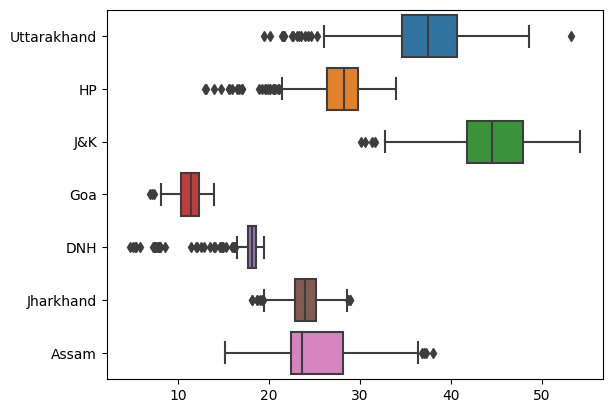

In [ ]:
sns.boxplot(DF_clean_Z[['Uttarakhand','HP','J&K','Goa','DNH','Jharkhand','Assam']],width=0.8,orient='h')

<Axes: >

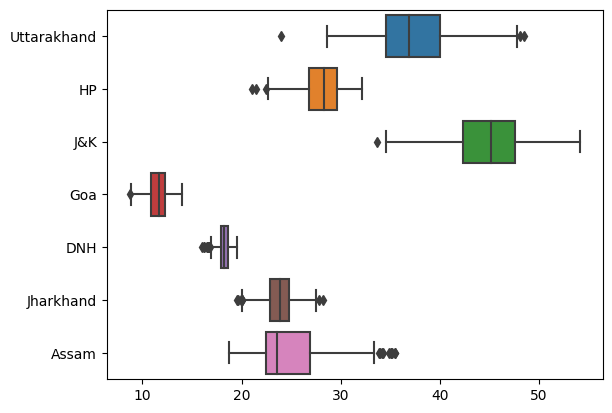

In [ ]:
sns.boxplot(DF_clean_Q[['Uttarakhand','HP','J&K','Goa','DNH','Jharkhand','Assam']],width=0.8,orient='h')

Проанализируем суммарное потребление электроэнергии

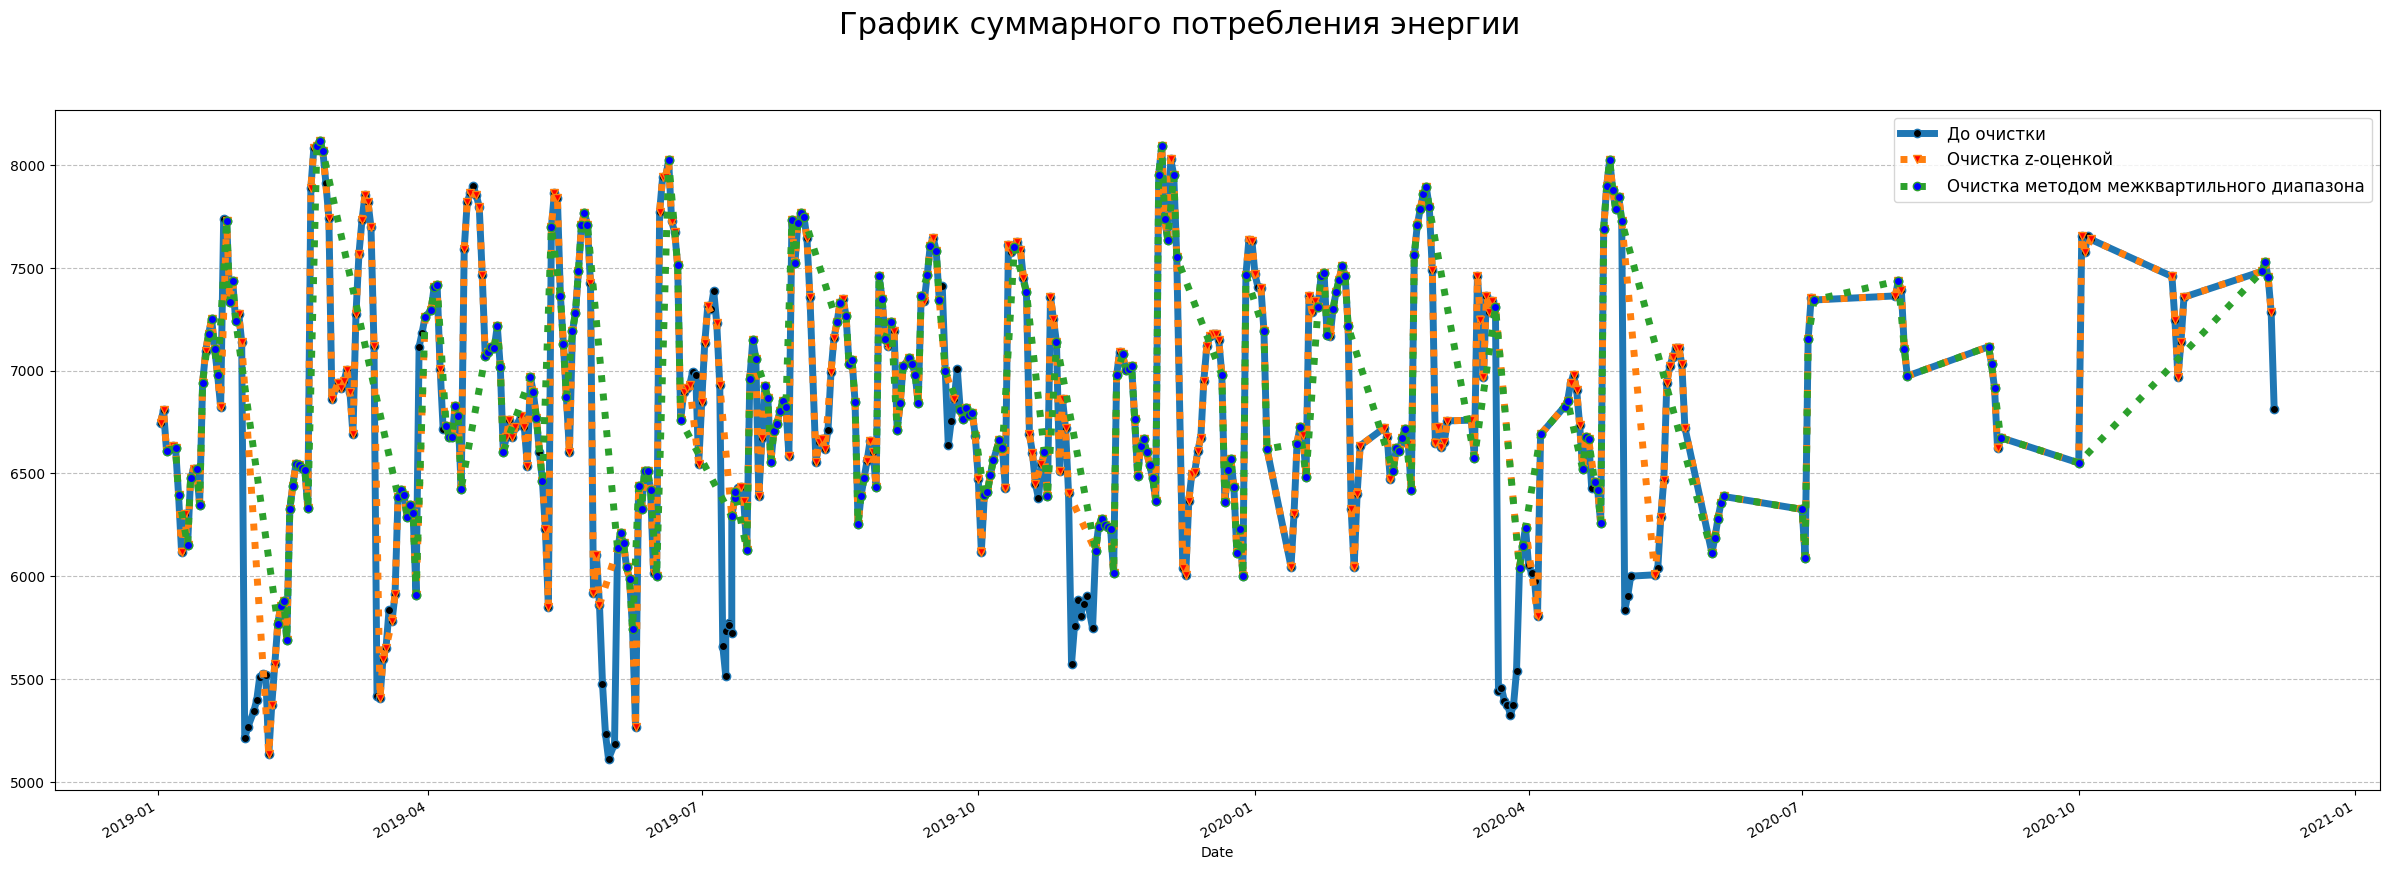

In [ ]:
fig,axes = plt.subplots(nrows=1)
fig.suptitle('График суммарного потребления энергии',fontsize=22)
DF_Main['sum'].plot(x=DF_Main.index,y=DF_Main['sum'],figsize=(30,10),label='До очистки',ax=axes,lw=5,linestyle='-',marker='o',markerfacecolor='black')
DF_clean_Z['sum'].plot(x=DF_clean_Z.index,y=DF_clean_Z['sum'],figsize=(30,10),label='Очистка z-оценкой',ax=axes,lw=5,linestyle=':',marker='v',markerfacecolor='red')
DF_clean_Q['sum'].plot(x=DF_clean_Q.index,y=DF_clean_Q['sum'],figsize=(30,10),label='Очистка методом межквартильного диапазона',ax=axes,lw=5,linestyle=':',marker='o',markerfacecolor='blue')

axes.legend(fontsize=12)
axes.grid(linestyle='--', alpha=0.8,axis='y')

Проведём оценку - на какие периоды выпало наибольшее потребление

In [8]:
DF_Main.where(DF_Main['mean'] > 230).dropna().head()

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,sum,mean
Date,,,,,,,,,,,,,,,,,,,,,
2019-02-22,166.3,173.6,257.9,114.9,435.6,46.5,29.4,47.8,5.4,89.0,...,1.3,2.1,28.0,2.7,5.0,1.7,2.0,5.0,8083.4,230.954286
2019-02-23,175.9,179.3,256.2,121.6,444.4,46.3,29.2,47.2,5.6,85.0,...,1.1,2.2,28.6,2.8,5.3,1.8,2.1,5.6,8091.0,231.171429
2019-02-24,183.6,185.9,250.0,128.1,469.0,46.7,30.3,47.0,6.0,88.6,...,1.0,2.1,27.0,2.5,4.9,1.7,2.2,5.3,8118.2,231.948571
2019-02-25,188.8,189.1,255.7,131.6,445.2,47.8,30.5,47.4,6.2,86.2,...,1.2,2.1,26.7,2.4,4.9,1.7,2.1,4.8,8065.6,230.445714
2019-12-01,210.1,199.8,278.0,139.1,461.2,48.1,30.1,42.0,6.7,91.5,...,1.2,2.3,31.8,2.6,5.8,1.7,2.2,5.8,8092.8,231.222857


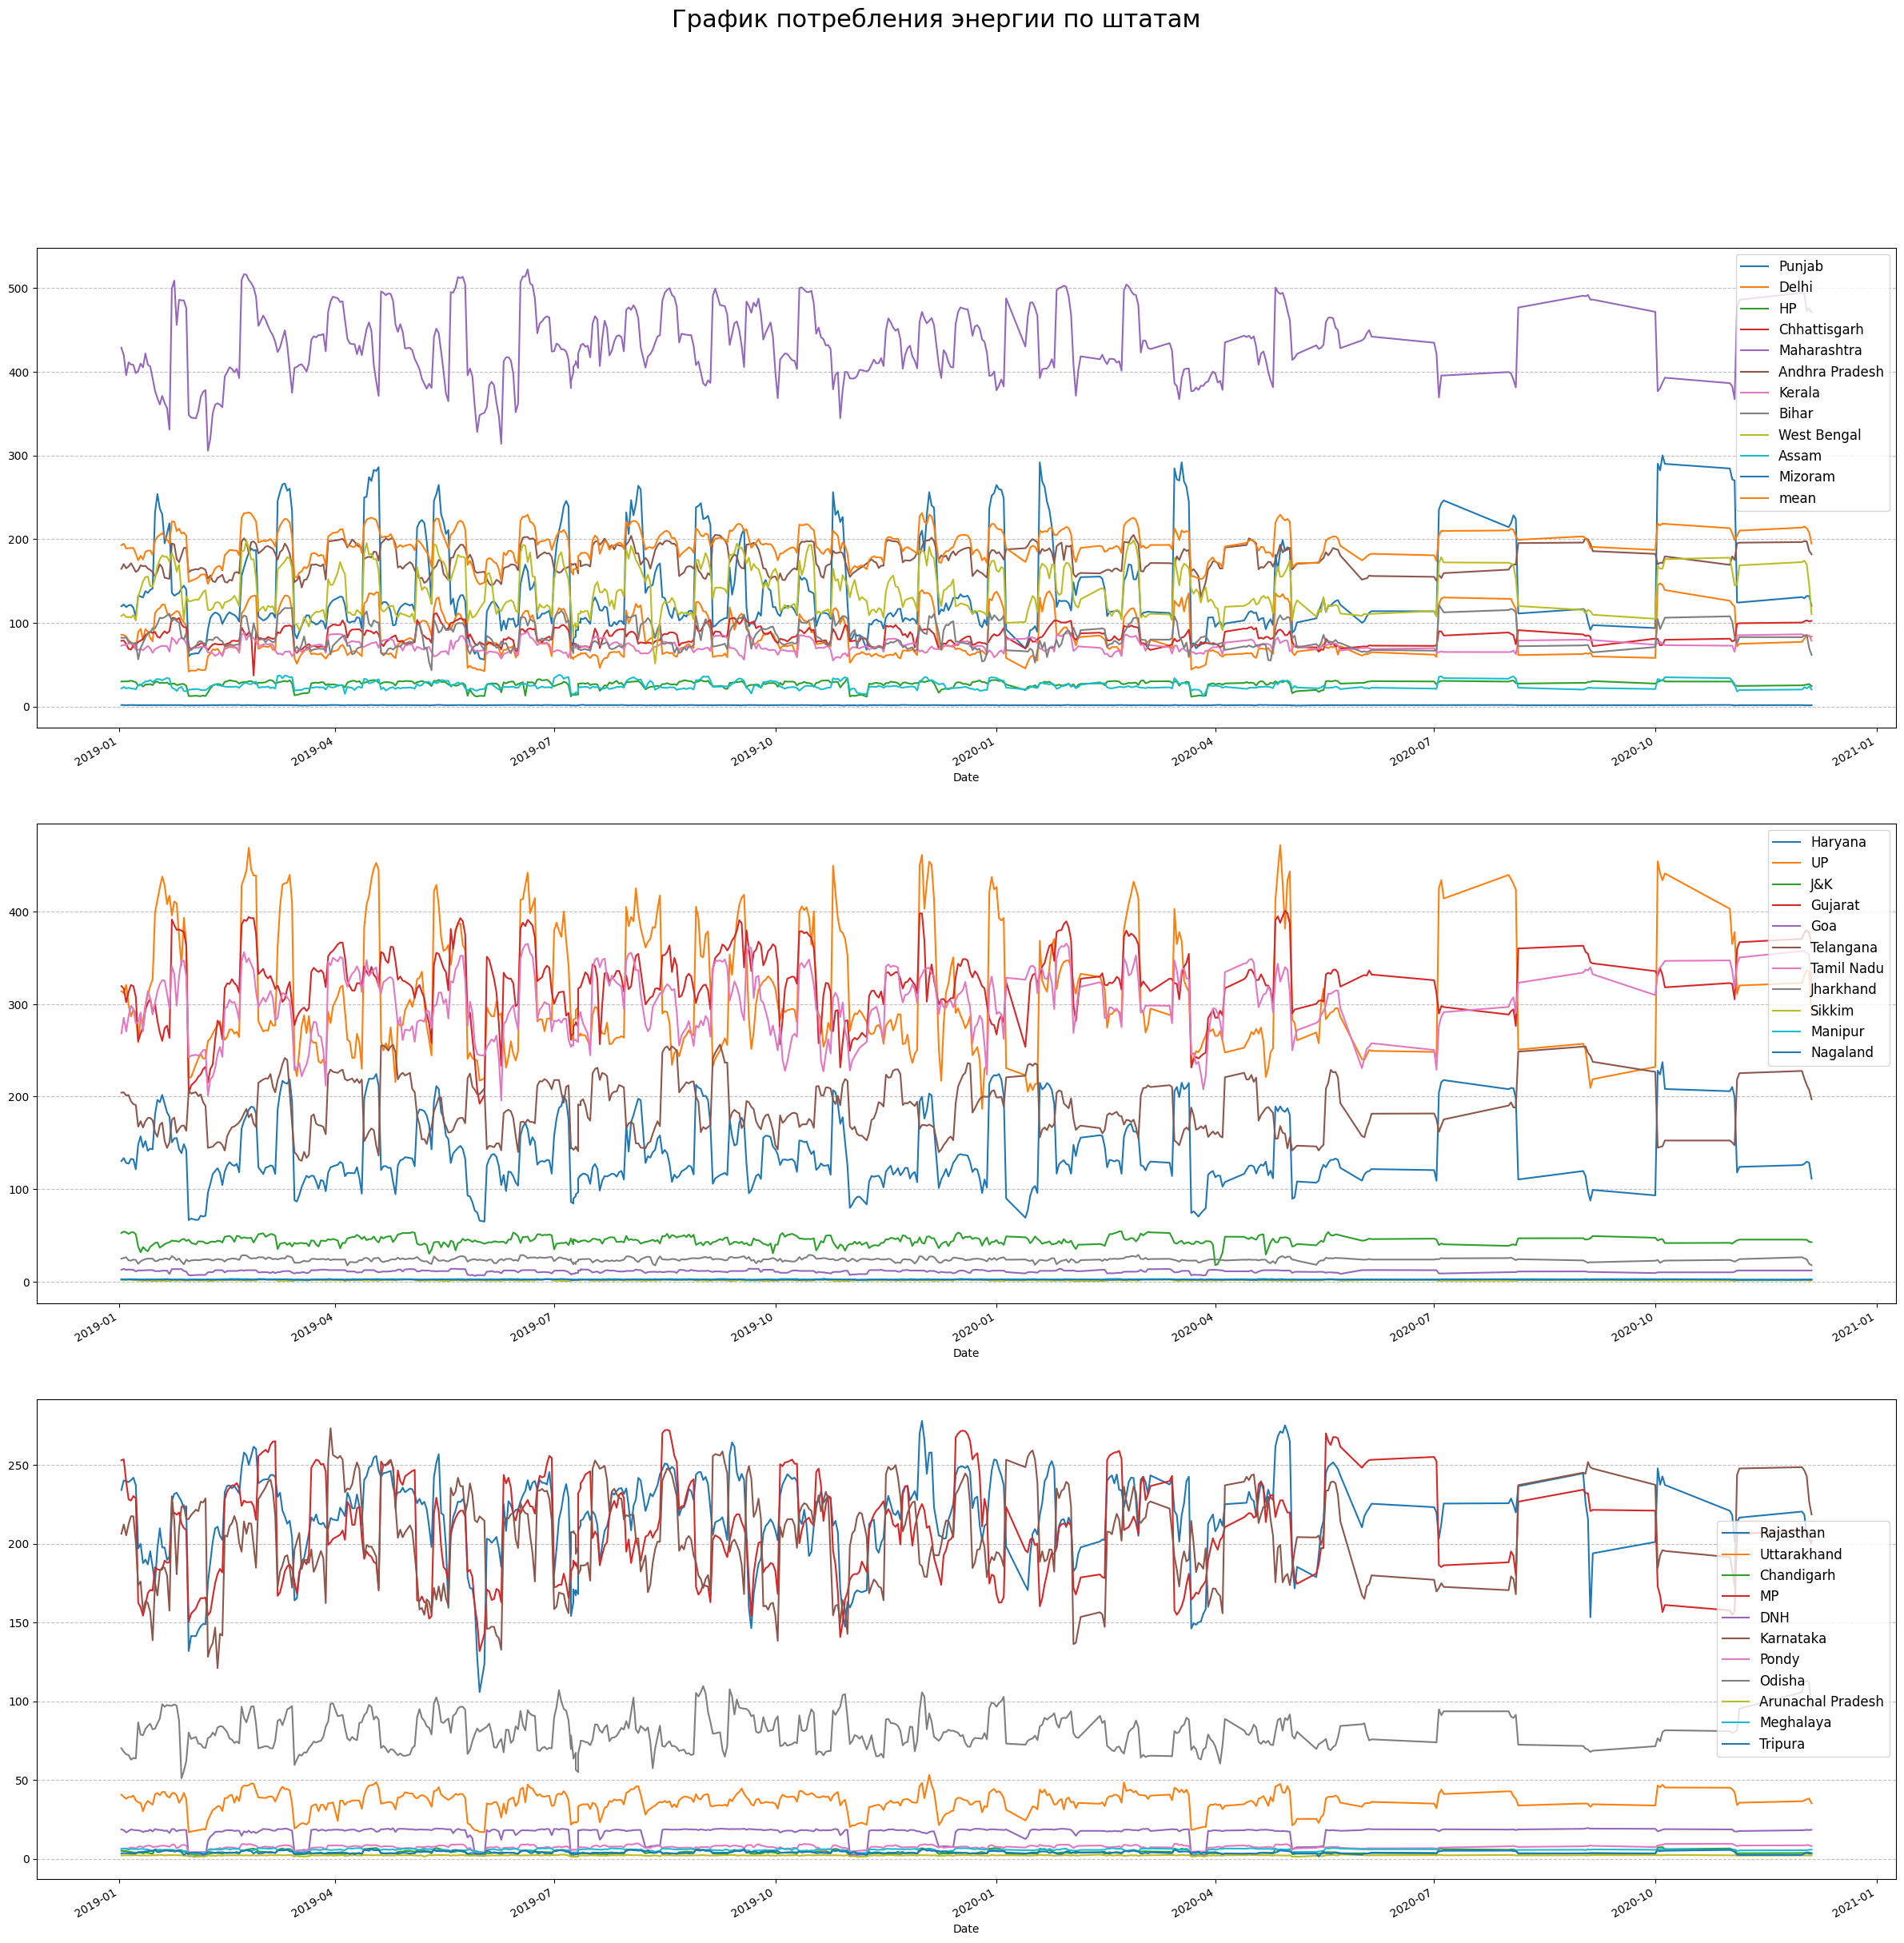

In [13]:
ax = 3 #Количество графиков
fig, axes = plt.subplots(nrows=ax)
fig.suptitle('График потребления энергии по штатам',fontsize=22)
fig.set_dpi(100)
i=0
for col in DF_Main:
  if col != 'sum':
    DF_Main[col].plot(x=DF_Main.index,y=DF_Main[col],figsize=(30,30),label=col,ax=axes[i%ax])
    i += 1

for i in range(0,ax):
  axes[i].legend(fontsize=12)
  axes[i].grid(linestyle='--', alpha=0.8,axis='y')


Выводы:
1. Анализ данных потребления электроэнергии в Индии показывает не равномерность потребления вызвынный различием в промышленных кластерах. Основные потребители - промышленные объекты и заводы.
2. Пандемия КОВИД-19 внесла значительные коррективы в экономическую ситуацию страны. Где то потребление вырасло и значительно стабилизировалось, а гдето упало на исторические минимумы.
3. Природа аномалий и выбрасов нуждается в доисследовании. Возможно в их приороде кроется ошибка в получении исходных данных и их интерпритации.

